In [1]:
import math
import pickle
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 150)
pd.set_option("display.precision", 3)

# This Notebook: 
Creating one large dataframe from all my scraped data, cleaning, and feature engineering to arrive at a final dataframe, where each row is a yoga class, and each value in its columns are ratios of how much of the class is spent in each type of pose. 

# Loading in Yoga Class Data

In [2]:
f = open("vinyasa_df", "rb")
vinyasa_df = pickle.load(f)
f.close()

In [3]:
f = open("ashtanga_df", "rb")
ashtanga_df = pickle.load(f)
f.close()

In [4]:
f = open("iyengar_df", "rb")
iyengar_df = pickle.load(f)
f.close()

In [5]:
f = open("power_df", "rb")
power_df = pickle.load(f)
f.close()

In [6]:
f = open("restorative_df", "rb")
restorative_df = pickle.load(f)
f.close()

In [7]:
f = open("hatha_df", "rb")
hatha_df = pickle.load(f)
f.close()

In [8]:
f = open("yin_df", "rb")
yin_df = pickle.load(f)
f.close()

In [9]:
f = open("gentle_df", "rb")
gentle_df = pickle.load(f)
f.close()

# Creating DataFrame

In [10]:
df = pd.concat([vinyasa_df, ashtanga_df, iyengar_df, power_df, restorative_df, hatha_df, gentle_df, yin_df])

In [12]:
# saving! for safety! 
f = open("all_yoga_classes_df", "wb")
pickle.dump(df, f)
f.close()

In [11]:
df

,Title,Poses,Class Type
0,←Slow Sunday Flow y Monday early,"[Easy Pose Hands To Heart, Easy Pose Hands Int...",Vinyasa
1,←Anahata,"[Mantra Section, Thunderbolt Pose, Easy Pose B...",Vinyasa
2,←CORE,"[Classic Sun Salutation Variation F, Chair Pos...",Vinyasa
3,←,"[Easy Pose, Easy Pose Warm Up Flow, Sun Saluta...",Vinyasa
4,←Vinyasa - Bench press & push up #,"[Corpse Pose, Corpse Pose Roll Under Spine, Wr...",Vinyasa
...,...,...,...
1582,←Shoulder-Heart Opener,"[Easy Pose, Easy Pose Neck Side Stretch, Easy ...",Yin
1583,←Yin Sequence,"[Easy Pose, Cat Cow Pose, Child Pose, Seated S...",Yin
1584,←Practicing Presence,"[Easy Pose Hands To Heart, Easy Pose Twist Rai...",Yin
1585,←Yin- Cooling,"[Sitali, Bound Angle Pose Blocks, Sun Breaths,...",Yin


# Filtering

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42893 entries, 0 to 1586
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       41273 non-null  object
 1   Poses       41273 non-null  object
 2   Class Type  41273 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


### Dropping NaN Values
web scraping modules coded in NaN if the class was "private" and no info could be obtained. dropping NaN: 

In [14]:
df = df.dropna(how="any")

In [15]:
df

,Title,Poses,Class Type
0,←Slow Sunday Flow y Monday early,"[Easy Pose Hands To Heart, Easy Pose Hands Int...",Vinyasa
1,←Anahata,"[Mantra Section, Thunderbolt Pose, Easy Pose B...",Vinyasa
2,←CORE,"[Classic Sun Salutation Variation F, Chair Pos...",Vinyasa
3,←,"[Easy Pose, Easy Pose Warm Up Flow, Sun Saluta...",Vinyasa
4,←Vinyasa - Bench press & push up #,"[Corpse Pose, Corpse Pose Roll Under Spine, Wr...",Vinyasa
...,...,...,...
1582,←Shoulder-Heart Opener,"[Easy Pose, Easy Pose Neck Side Stretch, Easy ...",Yin
1583,←Yin Sequence,"[Easy Pose, Cat Cow Pose, Child Pose, Seated S...",Yin
1584,←Practicing Presence,"[Easy Pose Hands To Heart, Easy Pose Twist Rai...",Yin
1585,←Yin- Cooling,"[Sitali, Bound Angle Pose Blocks, Sun Breaths,...",Yin


In [16]:
df.reset_index(inplace=True)
del df["index"]

In [17]:
df

,Title,Poses,Class Type
0,←Slow Sunday Flow y Monday early,"[Easy Pose Hands To Heart, Easy Pose Hands Int...",Vinyasa
1,←Anahata,"[Mantra Section, Thunderbolt Pose, Easy Pose B...",Vinyasa
2,←CORE,"[Classic Sun Salutation Variation F, Chair Pos...",Vinyasa
3,←,"[Easy Pose, Easy Pose Warm Up Flow, Sun Saluta...",Vinyasa
4,←Vinyasa - Bench press & push up #,"[Corpse Pose, Corpse Pose Roll Under Spine, Wr...",Vinyasa
...,...,...,...
41268,←Shoulder-Heart Opener,"[Easy Pose, Easy Pose Neck Side Stretch, Easy ...",Yin
41269,←Yin Sequence,"[Easy Pose, Cat Cow Pose, Child Pose, Seated S...",Yin
41270,←Practicing Presence,"[Easy Pose Hands To Heart, Easy Pose Twist Rai...",Yin
41271,←Yin- Cooling,"[Sitali, Bound Angle Pose Blocks, Sun Breaths,...",Yin


### Dropping Outliers
Getting an idea of the distribution of class lengths: 

In [18]:
class_length = [len(sequence) for sequence in df["Poses"]]

In [19]:
max(class_length)

3072

In [20]:
np.mean(class_length)

36.251011557192356

In [21]:
np.std(class_length)

31.337777463862473

In [22]:
# 3 standard devations from mean: 
38.75 + (3 * 29.27)

126.56

In [23]:
long_classes = [i for i in class_length if i > 127]

In [24]:
len(long_classes)

314

In [25]:
print(long_classes, end="")

[280, 183, 134, 129, 132, 135, 140, 152, 144, 159, 150, 233, 292, 154, 228, 128, 134, 187, 139, 136, 128, 153, 165, 141, 160, 128, 150, 147, 707, 175, 733, 197, 142, 169, 135, 775, 135, 129, 136, 305, 139, 156, 143, 250, 131, 129, 159, 131, 136, 144, 171, 128, 148, 153, 155, 228, 131, 178, 203, 136, 153, 144, 162, 153, 142, 149, 181, 158, 139, 185, 185, 330, 184, 129, 163, 201, 130, 170, 131, 128, 155, 139, 155, 150, 165, 163, 176, 165, 136, 154, 403, 133, 175, 129, 133, 137, 268, 146, 169, 164, 176, 143, 155, 155, 138, 131, 148, 217, 154, 222, 132, 136, 143, 144, 147, 139, 289, 139, 150, 132, 242, 145, 156, 176, 155, 157, 153, 134, 135, 135, 320, 134, 135, 180, 148, 307, 131, 145, 131, 150, 136, 160, 129, 140, 141, 128, 128, 173, 128, 213, 147, 129, 156, 188, 143, 134, 152, 136, 162, 185, 163, 162, 243, 187, 167, 135, 145, 182, 136, 214, 131, 131, 130, 160, 180, 231, 154, 132, 128, 197, 145, 177, 157, 217, 154, 153, 140, 135, 136, 147, 134, 187, 147, 142, 225, 128, 128, 166, 145, 134,

The first obvious thing I need to do is just drop the two extreme outlier values of more than 2000 poses - its not realistic that these would exist in a single class. 

In [26]:
df["Class Length"] = class_length

/Users/anterra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df = df.loc[df["Class Length"] <= 2000]

In [28]:
class_length = [len(sequence) for sequence in df["Poses"]]

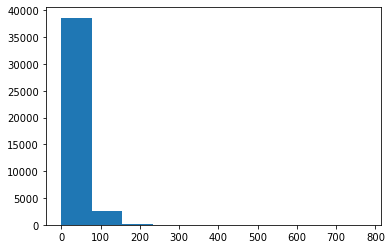

In [29]:
plt.hist(class_length);

Now that the extreme outliers are removed, we can look at the data. A value of above 127 would be more than 3 standard devations from the mean. However, this data is not normally distributed. Given that its somewhat right skewed, and there are many classes with lengths just slightly above 127, which I don't want to exclude. Looking at the list of long classes above, only a few outliers are above 200 poses, so I will exclude those. 

In [30]:
df["Class Length"] = class_length

/Users/anterra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df = df.loc[df["Class Length"] <= 200]

In [32]:
df.reset_index(inplace=True)

In [33]:
del df["index"]

# Data Manipulation to Access Poses
Currently, the sequences of poses that comprise each class exist as nested lists inside the each row of the dataframe, each row being a class. This is not very usable for classification purposes. What I will do to make the data more accessible is turn each list into a Series, and then melt each Series into the DataFrame such that each row will become a single pose instead of a class, and the class that each pose belongs to will exist as a column which can later be grouped by for analysis by class. 

In [34]:
# adding class number for easy aggregation
df["Class Number"] = df.index

In [35]:
df = df[["Class Number", "Poses", "Class Length", "Class Type"]] 

In [36]:
df

,Class Number,Poses,Class Length,Class Type
0,0,"[Easy Pose Hands To Heart, Easy Pose Hands Int...",53,Vinyasa
1,1,"[Mantra Section, Thunderbolt Pose, Easy Pose B...",52,Vinyasa
2,2,"[Classic Sun Salutation Variation F, Chair Pos...",19,Vinyasa
3,3,"[Easy Pose, Easy Pose Warm Up Flow, Sun Saluta...",18,Vinyasa
4,4,"[Corpse Pose, Corpse Pose Roll Under Spine, Wr...",79,Vinyasa
...,...,...,...,...
41220,41220,"[Easy Pose, Easy Pose Neck Side Stretch, Easy ...",25,Yin
41221,41221,"[Easy Pose, Cat Cow Pose, Child Pose, Seated S...",10,Yin
41222,41222,"[Easy Pose Hands To Heart, Easy Pose Twist Rai...",31,Yin
41223,41223,"[Sitali, Bound Angle Pose Blocks, Sun Breaths,...",20,Yin


In [37]:
# splitting list of poses up into individual columns
df["Poses"].apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,Easy Pose Hands To Heart,Easy Pose Hands Interlocked Behind Head,Seated Torso Circles,Easy Pose Variation Side,Half Easy Pose Half Forward Bend,Seated Windshield Wiper Pose Chest Opener Vari...,Cat Cow Pose,Child Pose Hip Circles Flow,Thread The Needle Pose Flow,Downward Facing Dog Pose,Downward Facing Dog Pose Plank Pose Flow,Right Leg Forward,Three Legged Downward Facing Dog Pose Prep,Fallen Triangle Pose Variation,Repeat Other Side,Right Leg Forward,Three Legged Downward Facing Dog Pose,Low Lunge Hands To Knee,Low Lunge Pose Open Twist,Revolved Low Lunge Pose Knee On The Floor,Runners Lunge Pose,Revolved Lunge Pose,Extended Side Angle Pose Variation Hand In Front,Three Legged Downward Facing Dog Pose,Low Lunge Hands To Knee,Left Leg Forward,Repeat Other Side,Top Of Mat Section,Mountain Pose,Crescent High Lunge Pose Arms On Hips Flow,Crescent High Lunge Pose Variation Back Knee Bent,Warrior Pose I Eagle Arms,Warrior Pose II,Reverse Warrior Pose,Intense Leg Stretch Pose,Revolved Wide Legged Forward Bend Pose Block,Intense Leg Stretch Pose,Back Of Mat Section,Repeat Other Side,Staff Pose Knee Stretches,Wild Thing Pose,Side Plank Pose Variation (One Knee On The Floor),Half Moon Variation (Knee On The Floor),Side Plank Pose Crunch,Half Circle Pose,Puppy Dog Pose,Repeat Other Side,Cow Face Pose,Wind Release Pose,Reverse Pigeon Pose Variation,Bridge Pose Variation Hands,Supine Spinal Twist Yoga Pose I,Corpse Pose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mantra Section,Thunderbolt Pose,Easy Pose Bound Hands,Thunderbolt Pose Arms Rotation,Hero Pose Cow Face Arms,Table Top Pose,Tiger Pose Table Top Pose Knee To Nose Flow,Puppy Dog Pose,Classic Sun Salutation Variation Iv,Classic Sun Salutation Variation Iv,Sun Salutation A,Sun Salutation A,Sun Salutation B,Sun Salutation B,Standing Yoga Seal Pose Chair Pose Bound Hands...,Eagle Pose,Sun Salutation A First Half,Crescent High Lunge Pose Arms On Hips Flow,Crescent High Lunge Shoulder Opener,Humble Warrior Pose,Belly Down Vinyasa,Warrior Pose I,Warrior Pose I Bound Hands Humble Warrior Flow,Pyramid Pose Flow,Standing Balance One Leg Raised Warrior Pose I...,Belly Down Vinyasa,Locust Pose Variation One Leg And Arm On Floor,Bow Pose Variation,Bow Pose,Belly Down Vinyasa,Wheel Pose Prep,Wheel Pose,One-Legged Wheel Pose,Belly Down Vinyasa,Half Boat Pose Variation A,Boat Pose Variation Knees Bent Arms Side,Reverse Pigeon Pose,Belly Down Vinyasa,Half Pigeon Pose Variation I,Revolved Half Pigeon Pose Variation,Sleeping Swan Pose,Belly Down Vinyasa,Headstand Pose,Headstand Pose Bound Angle Legs,Headstand Pose Wide Legs,Wide Child Pose Variation Hands On Head,Reclining Deer Pose,Wind Release Pose,Corpse Pose,Side Fetal Pose B,Accomplished Pose,Mantra Section,NaN,NaN,NaN,NaN,NaN,

In [38]:
# merging above into the original dataframe
df = df["Poses"].apply(pd.Series).merge(df, left_index=True, right_index=True)

In [39]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,Class Number,Poses,Class Length,Class Type
0,Easy Pose Hands To Heart,Easy Pose Hands Interlocked Behind Head,Seated Torso Circles,Easy Pose Variation Side,Half Easy Pose Half Forward Bend,Seated Windshield Wiper Pose Chest Opener Vari...,Cat Cow Pose,Child Pose Hip Circles Flow,Thread The Needle Pose Flow,Downward Facing Dog Pose,Downward Facing Dog Pose Plank Pose Flow,Right Leg Forward,Three Legged Downward Facing Dog Pose Prep,Fallen Triangle Pose Variation,Repeat Other Side,Right Leg Forward,Three Legged Downward Facing Dog Pose,Low Lunge Hands To Knee,Low Lunge Pose Open Twist,Revolved Low Lunge Pose Knee On The Floor,Runners Lunge Pose,Revolved Lunge Pose,Extended Side Angle Pose Variation Hand In Front,Three Legged Downward Facing Dog Pose,Low Lunge Hands To Knee,Left Leg Forward,Repeat Other Side,Top Of Mat Section,Mountain Pose,Crescent High Lunge Pose Arms On Hips Flow,Crescent High Lunge Pose Variation Back Knee Bent,Warrior Pose I Eagle Arms,Warrior Pose II,Reverse Warrior Pose,Intense Leg Stretch Pose,Revolved Wide Legged Forward Bend Pose Block,Intense Leg Stretch Pose,Back Of Mat Section,Repeat Other Side,Staff Pose Knee Stretches,Wild Thing Pose,Side Plank Pose Variation (One Knee On The Floor),Half Moon Variation (Knee On The Floor),Side Plank Pose Crunch,Half Circle Pose,Puppy Dog Pose,Repeat Other Side,Cow Face Pose,Wind Release Pose,Reverse Pigeon Pose Variation,Bridge Pose Variation Hands,Supine Spinal Twist Yoga Pose I,Corpse Pose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"[Easy Pose Hands To Heart, Easy Pose Hands Int...",53,Vinyasa
1,Mantra Section,Thunderbolt Pose,Easy Pose Bound Hands,Thunderbolt Pose Arms Rotation,Hero Pose Cow Face Arms,Table Top Pose,Tiger Pose Table Top Pose Knee To Nose Flow,Puppy Dog Pose,Classic Sun Salutation Variation Iv,Classic Sun Salutation Variation Iv,Sun Salutation A,Sun Salutation A,Sun Salutation B,Sun Salutation B,Standing Yoga Seal Pose Chair Pose Bound Hands...,Eagle Pose,Sun Salutation A First Half,Crescent High Lunge Pose Arms On Hips Flow,Crescent High Lunge Shoulder Opener,Humble Warrior Pose,Belly Down Vinyasa,Warrior Pose I,Warrior Pose I Bound Hands Humble Warrior Flow,Pyramid Pose Flow,Standing Balance One Leg Raised Warrior Pose I...,Belly Down Vinyasa,Locust Pose Variation One Leg And Arm On Floor,Bow Pose Variation,Bow Pose,Belly Down Vinyasa,Wheel Pose Prep,Wheel Pose,One-Legged Wheel Pose,Belly Down Vinyasa,Half Boat Pose Variation A,Boat Pose Variation Knees Bent Arms Side,Reverse Pigeon Pose,Belly Down Vinyasa,Half Pigeon Pose Variation I,Revolved Half Pigeon Pose Variation,Sleeping Swan Pose,Belly Down Vinyasa,Headstand Pose,Headstand Pose Bound Angle Legs,Headstand Pose Wide Legs,Wide Child Pose Variation Hands On Head,Reclining Dee

In [40]:
# now that each pose has its own row, list of all poses no longer needed 
del df["Poses"]

In [41]:
# melting rows of poses into columns of poses 
df = df.melt(id_vars = ["Class Number", "Class Length", "Class Type"], value_name = "Poses")

In [42]:
df

,Class Number,Class Length,Class Type,variable,Poses
0,0,53,Vinyasa,0,Easy Pose Hands To Heart
1,1,52,Vinyasa,0,Mantra Section
2,2,19,Vinyasa,0,Classic Sun Salutation Variation F
3,3,18,Vinyasa,0,Easy Pose
4,4,79,Vinyasa,0,Corpse Pose
...,...,...,...,...,...
8244995,41220,25,Yin,199,NaN
8244996,41221,10,Yin,199,NaN
8244997,41222,31,Yin,199,NaN
8244998,41223,20,Yin,199,NaN


In [43]:
# sorting by 'class number' to group the poses of each class, and sorting by 'variable' to 
# maintain the sequence order of the poses within each class
df.sort_values(["Class Number", "variable"], inplace=True) 

In [44]:
df = df[["Class Number", "Poses", "Class Length", "Class Type"]]

In [45]:
df

,Class Number,Poses,Class Length,Class Type
0,0,Easy Pose Hands To Heart,53,Vinyasa
41225,0,Easy Pose Hands Interlocked Behind Head,53,Vinyasa
82450,0,Seated Torso Circles,53,Vinyasa
123675,0,Easy Pose Variation Side,53,Vinyasa
164900,0,Half Easy Pose Half Forward Bend,53,Vinyasa
...,...,...,...,...
8080099,41224,NaN,16,Yin
8121324,41224,NaN,16,Yin
8162549,41224,NaN,16,Yin
8203774,41224,NaN,16,Yin


In [46]:
# dropping any rows with NaN values since these are not poses, just empty values that got carried over from the transpose
df.dropna(inplace=True)

/Users/anterra/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [47]:
df

,Class Number,Poses,Class Length,Class Type
0,0,Easy Pose Hands To Heart,53,Vinyasa
41225,0,Easy Pose Hands Interlocked Behind Head,53,Vinyasa
82450,0,Seated Torso Circles,53,Vinyasa
123675,0,Easy Pose Variation Side,53,Vinyasa
164900,0,Half Easy Pose Half Forward Bend,53,Vinyasa
...,...,...,...,...
494699,41224,Shoulder Stretch Pose,16,Yin
535924,41224,Banana Pose,16,Yin
577149,41224,Banana Pose,16,Yin
618374,41224,Reclined Butterfly Pose Hands To Elbows,16,Yin


# Loading in Pose Data
I separately scraped information about over 3600 individual yoga poses, including their name, what base pose they were derived from if they are a variation, what level (beginner, intermediate or advanced) they are, what position the body is in during the pose, what type of movement the body will be doing (can be several at once depending on the pose), and what chakras are activated during the pose. 

In [48]:
f = open("yoga_poses_df", "rb")
yoga_poses_df = pickle.load(f)
f.close()

In [49]:
yoga_poses_df

,Pose Name,Pose Name,Level,Position,Movement Type,Chakras,Base Pose
0,Complete Boat Pose,Complete Boat Pose,Intermediate,Sitting,"[Forward-Bend,, Strength,, Balance]",[Solar Plexus (Manipura Chakra)],Boat Pose
1,Boat Pose Aerial Variation,Boat Pose Aerial Variation,Intermediate,Sitting,"[Strength,, Balance]",[Solar Plexus (Manipura Chakra)],Boat Pose
2,Boat Pose Aerial,Boat Pose Aerial,Advanced,Sitting,"[Balance,, Strength]",[Solar Plexus (Manipura Chakra)],Boat Pose
3,Boat Pose Variation 1 Arms Overhead,Boat Pose Variation 1 Arms Overhead,Intermediate,Sitting,"[Strength,, Stretch,, Balance]",[Solar Plexus (Manipura Chakra)],Boat Pose
4,Boat Pose Arms Overhead,Boat Pose Arms Overhead,Intermediate,Sitting,"[Strength,, Stretch]",[Solar Plexus (Manipura Chakra)],Boat Pose
...,...,...,...,...,...,...,...
3634,Wind Release Pose To Standing Pose Flow,Wind Release Pose To Standing Pose Flow,Beginner,Supine,[Strength],[Solar Plexus (Manipura Chakra)],Wind Release Pose
3635,Supine Hip Flexor Roller,Supine Hip Flexor Roller,Intermediate,Supine,"[Strength,, Stretch,, Balance]",NaN,Wind Release Pose
3636,Supine Knee Rolls Straps,Supine Knee Rolls Straps,Beginner,Supine,[Stretch],NaN,Wind Release Pose
3637,Supine Leg Lifts With Baby,Supine Leg Lifts With Baby,Beginner,Supine,[Strength],NaN,Wind Release Pose


In [50]:
yoga_poses_df["Base Pose"].unique()

array(['Boat Pose', 'request it here', 'Bound Angle Pose', 'Bow Pose',
       'Bridge Pose', 'Camel Pose', 'Cat Cow Pose',
       'Cat Tail Pulling Pose', 'Center Splits Pose', 'Chair Pose',
       'Child Pose', 'Cobra Pose', 'Corpse Pose', 'Savasana',
       'Cow Face Pose', 'Crane Pose', 'Crow Pose', 'Cycling Pose',
       'Dancer Pose', 'Dolphin Pose', 'Downward Facing Dog Pose',
       'Eagle Pose', 'Easy Pose', 'Easy Pose Chair', 'Exercise',
       'Extended Side Angle Pose', 'Eye Exercise',
       'Eye Of The Needle Pose', 'Feathered Peacock Pose', 'Firelog Pose',
       'Fish Pose', 'Flamingo Pose', 'Foot Behind The Head Pose',
       'Four Limbed Staff Pose', 'Garland Pose', 'Gate Pose',
       'Goddess Pose', 'Half Lord Of The Fishes Pose', 'Half Moon Pose',
       'Handstand Pose', 'Happy Baby Pose', 'Head To Knee Pose',
       'Headstand Pose', 'Hero Pose', nan, 'High Lunge Pose',
       'Intense Leg Stretch Pose', 'Intense Side Stretch Pose',
       'Legs Up The Wall Pose',

In [51]:
# removing duplicate column
yoga_poses_df.columns = ["Pose Name", "delete me", "Level", "Position", "Movement Type", "Chakras", "Base Pose"]

In [52]:
del yoga_poses_df["delete me"]

In [53]:
yoga_poses_df.head(3)

,Pose Name,Level,Position,Movement Type,Chakras,Base Pose
0,Complete Boat Pose,Intermediate,Sitting,"[Forward-Bend,, Strength,, Balance]",[Solar Plexus (Manipura Chakra)],Boat Pose
1,Boat Pose Aerial Variation,Intermediate,Sitting,"[Strength,, Balance]",[Solar Plexus (Manipura Chakra)],Boat Pose
2,Boat Pose Aerial,Advanced,Sitting,"[Balance,, Strength]",[Solar Plexus (Manipura Chakra)],Boat Pose


# Merging DataFrames
I am now merging the information about each pose into the first DataFrame of poses in each class, to get a better idea of the distribution of types of poses based on all of the above mentioned metrics within each class. 

In [54]:
df = pd.merge(left=df, right=yoga_poses_df, how="left", left_on="Poses", right_on="Pose Name")

In [55]:
df

,Class Number,Poses,Class Length,Class Type,Pose Name,Level,Position,Movement Type,Chakras,Base Pose
0,0,Easy Pose Hands To Heart,53,Vinyasa,Easy Pose Hands To Heart,Beginner,Sitting,"[Restorative,, Stretch]",[Root Chakra (Muladhara Chakra)],Easy Pose
1,0,Easy Pose Hands Interlocked Behind Head,53,Vinyasa,Easy Pose Hands Interlocked Behind Head,Beginner,Sitting,[Stretch],[Root Chakra (Muladhara Chakra)],Neck Rolls
2,0,Seated Torso Circles,53,Vinyasa,Seated Torso Circles,Beginner,Sitting,"[Stretch,]",[Throat Chakra (Vishuddha Chakra)],Easy Pose
3,0,Easy Pose Variation Side,53,Vinyasa,Easy Pose Variation Side,Beginner,Sitting,"[Restorative,]",[Heart Chakra (Anahata Chakra)],Palm Tree Pose
4,0,Half Easy Pose Half Forward Bend,53,Vinyasa,Half Easy Pose Half Forward Bend,Beginner,Sitting,"[Forward-Bend,]",[Root Chakra (Muladhara Chakra)],Easy Pose
...,...,...,...,...,...,...,...,...,...,...
1527677,41224,Banana Pose,16,Yin,Banana Pose,Beginner,Supine,"[Restorative,, Side-Bend,, Stretch]",[Solar Plexus (Manipura Chakra)],Supine Spinal Twist Pose
1527678,41224,Banana Pose,16,Yin,Banana Pose,Beginner,Supine,"[Restorative,, Side-Bend,, Stretch]",[Solar Plexus (Manipura Chakra)],Supine Spinal Twist Pose
1527679,41224,Reclined Butterfly Pose Hands To Elbows,16,Yin,Reclined Butterfly Pose Hands To Elbows,Beginner,Supine,[Stretch],[Crown Chakra (Sahasrara Chakra)],Reclined Bound Angle Pose
1527680,41224,Corpse Pose,16,Yin,Corpse Pose,Beginner,Supine,"[Restorative,]",[Crown Chakra (Sahasrara Chakra)],Corpse Pose


In [56]:
# removing duplicate rows, reordering so target variable is last
df = df[["Class Number", "Class Length", "Poses", "Level", "Position", "Movement Type", "Chakras", "Base Pose", "Class Type"]]

In [57]:
df.head(3)

,Class Number,Class Length,Poses,Level,Position,Movement Type,Chakras,Base Pose,Class Type
0,0,53,Easy Pose Hands To Heart,Beginner,Sitting,"[Restorative,, Stretch]",[Root Chakra (Muladhara Chakra)],Easy Pose,Vinyasa
1,0,53,Easy Pose Hands Interlocked Behind Head,Beginner,Sitting,[Stretch],[Root Chakra (Muladhara Chakra)],Neck Rolls,Vinyasa
2,0,53,Seated Torso Circles,Beginner,Sitting,"[Stretch,]",[Throat Chakra (Vishuddha Chakra)],Easy Pose,Vinyasa


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1527682 entries, 0 to 1527681
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Class Number   1527682 non-null  int64 
 1   Class Length   1527682 non-null  int64 
 2   Poses          1527682 non-null  object
 3   Level          1296200 non-null  object
 4   Position       1296200 non-null  object
 5   Movement Type  1296200 non-null  object
 6   Chakras        1042746 non-null  object
 7   Base Pose      1401759 non-null  object
 8   Class Type     1527682 non-null  object
dtypes: int64(2), object(7)
memory usage: 116.6+ MB


# Getting Dummies

Even though tree-based methods do not strictly require dummy variables and could handle categorical variables, its important to keep in mind what I am trying to classify -- ultimately I want to know what features of a yoga *class* lead to it being classified as each genre of yoga. Right now my dataframe is divided into rows of individual poses, but this is not what I'm interested in. I need to know aggregate information about all of the poses in each class, and having dummy variables each category, so that I can then sum the dummys to get total counts of the number of poses that fall into each category for each class, is the most meaningful way to use this data. 

### Unpacking nested lists from Movement Type column
As above, nested lists are not useful. The categorical variable of "Movement Type" has 7 possible values, that I will get dummies for.

In [59]:
movement_df = df["Movement Type"].apply(pd.Series)

In [60]:
movement_df

,0,1,2,3,4,5,6
0,"Restorative,",Stretch,NaN,NaN,NaN,NaN,NaN
1,Stretch,NaN,NaN,NaN,NaN,NaN,NaN
2,"Stretch,",NaN,NaN,NaN,NaN,NaN,NaN
3,"Restorative,",NaN,NaN,NaN,NaN,NaN,NaN
4,"Forward-Bend,",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1527677,"Restorative,","Side-Bend,",Stretch,NaN,NaN,NaN,NaN
1527678,"Restorative,","Side-Bend,",Stretch,NaN,NaN,NaN,NaN
1527679,Stretch,NaN,NaN,NaN,NaN,NaN,NaN
1527680,"Restorative,",NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
dummies = pd.get_dummies(movement_df)

In [62]:
dummies

,0_Back-Bend,"0_Back-Bend,",0_Balance,"0_Balance,",0_Forward-Bend,"0_Forward-Bend,",0_Inversion,"0_Inversion,",0_Meditative,"0_Meditative,",0_Pranayama,"0_Pranayama,",0_Restorative,"0_Restorative,",0_Side-Bend,"0_Side-Bend,",0_Strength,"0_Strength,",0_Stretch,"0_Stretch,",0_Twist,"0_Twist,",1_Back-Bend,"1_Back-Bend,",1_Balance,1_Forward-Bend,"1_Forward-Bend,",1_Inversion,"1_Inversion,",1_Meditative,"1_Meditative,",1_Pranayama,"1_Pranayama,",1_Restorative,"1_Restorative,",1_Side-Bend,"1_Side-Bend,",1_Strength,"1_Strength,",1_Stretch,"1_Stretch,",1_Twist,"1_Twist,",2_Back-Bend,"2_Back-Bend,",2_Balance,2_Inversion,"2_Inversion,",2_Meditative,"2_Meditative,",2_Pranayama,"2_Pranayama,",2_Restorative,"2_Restorative,","2_Side-Bend,",2_Strength,"2_Strength,",2_Stretch,"2_Stretch,",2_Twist,"2_Twist,",3_Balance,3_Inversion,"3_Inversion,",3_Restorative,"3_Restorative,",3_Side-Bend,"3_Side-Bend,",3_Strength,"3_Strength,",3_Stretch,"3_Stretch,",3_Twist,"3_Twist,",4_Balance,4_Inversion,"4_Inversion,",4_Strength,"4_Strength,","4_Stretch,",4_Twist,"4_Twist,",5_Balance,5_Inversion,"5_Inversion,",5_Strength,"5_Strength,",6_Balance,6_Strength
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527677,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1527678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1527679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1527680,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
dummies.columns

Index(['0_Back-Bend', '0_Back-Bend,', '0_Balance', '0_Balance,',
       '0_Forward-Bend', '0_Forward-Bend,', '0_Inversion', '0_Inversion,',
       '0_Meditative', '0_Meditative,', '0_Pranayama', '0_Pranayama,',
       '0_Restorative', '0_Restorative,', '0_Side-Bend', '0_Side-Bend,',
       '0_Strength', '0_Strength,', '0_Stretch', '0_Stretch,', '0_Twist',
       '0_Twist,', '1_Back-Bend', '1_Back-Bend,', '1_Balance',
       '1_Forward-Bend', '1_Forward-Bend,', '1_Inversion', '1_Inversion,',
       '1_Meditative', '1_Meditative,', '1_Pranayama', '1_Pranayama,',
       '1_Restorative', '1_Restorative,', '1_Side-Bend', '1_Side-Bend,',
       '1_Strength', '1_Strength,', '1_Stretch', '1_Stretch,', '1_Twist',
       '1_Twist,', '2_Back-Bend', '2_Back-Bend,', '2_Balance', '2_Inversion',
       '2_Inversion,', '2_Meditative', '2_Meditative,', '2_Pranayama',
       '2_Pranayama,', '2_Restorative', '2_Restorative,', '2_Side-Bend,',
       '2_Strength', '2_Strength,', '2_Stretch', '2_Stretch,', 

Since movement types were listed in varying orders, and some had commas attached making them "different", it generated a ton of dummy columns for not only type of movement but in what order it was listed and both with/without comma. This is all irrelevant (all movement types are describing the same pose and are all taking place at once, order they happened to be listed in doens't matter) so combining to clean this up (and yes, this is a pretty tedious way to do this and regex would have been great to implement here but I just want to make sure it does exactly what I want so I'm willing to do it by hand): 

In [64]:
dummies["Back-Bend"] = dummies["0_Back-Bend"] + dummies["0_Back-Bend,"] + dummies["1_Back-Bend"] + dummies["1_Back-Bend,"] + dummies["2_Back-Bend"] + dummies["2_Back-Bend,"]
del dummies["0_Back-Bend"], dummies["0_Back-Bend,"], dummies["1_Back-Bend"], dummies["1_Back-Bend,"], dummies["2_Back-Bend"], dummies["2_Back-Bend,"]

In [65]:
dummies["Balance"] = dummies["0_Balance"] + dummies["0_Balance,"] + dummies["1_Balance"] + dummies["2_Balance"] + dummies["3_Balance"] + dummies["4_Balance"] + dummies["5_Balance"] + dummies["6_Balance"]
del dummies["0_Balance"], dummies["0_Balance,"], dummies["1_Balance"], dummies["2_Balance"], dummies["3_Balance"], dummies["4_Balance"], dummies["5_Balance"], dummies["6_Balance"]

In [66]:
dummies["Forward-Bend"] = dummies["0_Forward-Bend"] + dummies["0_Forward-Bend,"] + dummies["1_Forward-Bend"] + dummies["1_Forward-Bend,"]
del dummies["0_Forward-Bend"], dummies["0_Forward-Bend,"], dummies["1_Forward-Bend"], dummies["1_Forward-Bend,"]

In [67]:
dummies["Inversion"] = dummies["0_Inversion"] + dummies["0_Inversion,"] + dummies["1_Inversion"] + dummies["1_Inversion,"] + dummies["2_Inversion"] + dummies["2_Inversion,"] + dummies["3_Inversion"] + dummies["3_Inversion,"] + dummies["4_Inversion"] + dummies["4_Inversion,"] + dummies["5_Inversion"] + dummies["5_Inversion,"]
del dummies["0_Inversion"], dummies["0_Inversion,"], dummies["1_Inversion"], dummies["1_Inversion,"], dummies["2_Inversion"], dummies["2_Inversion,"], dummies["3_Inversion"], dummies["3_Inversion,"], dummies["4_Inversion"], dummies["4_Inversion,"], dummies["5_Inversion"], dummies["5_Inversion,"]

In [68]:
dummies["Meditative"] = dummies["0_Meditative"] + dummies["0_Meditative,"] + dummies["1_Meditative"] + dummies["1_Meditative,"] + dummies["2_Meditative"] + dummies["2_Meditative,"]
del dummies["0_Meditative"], dummies["0_Meditative,"], dummies["1_Meditative"], dummies["1_Meditative,"], dummies["2_Meditative"], dummies["2_Meditative,"]

In [69]:
dummies["Pranayama"] = dummies["0_Pranayama"] + dummies["0_Pranayama,"] + dummies["1_Pranayama"] + dummies["1_Pranayama,"] + dummies["2_Pranayama"] + dummies["2_Pranayama,"]
del dummies["0_Pranayama"], dummies["0_Pranayama,"], dummies["1_Pranayama"], dummies["1_Pranayama,"], dummies["2_Pranayama"], dummies["2_Pranayama,"]

In [70]:
dummies["Restorative"] = dummies["0_Restorative"] + dummies["0_Restorative,"] + dummies["1_Restorative"] + dummies["1_Restorative,"] + dummies["2_Restorative"] + dummies["2_Restorative,"] + dummies["3_Restorative"] + dummies["3_Restorative,"]
del dummies["0_Restorative"], dummies["0_Restorative,"], dummies["1_Restorative"], dummies["1_Restorative,"], dummies["2_Restorative"], dummies["2_Restorative,"], dummies["3_Restorative"], dummies["3_Restorative,"]

In [71]:
dummies["Side-Bend"] = dummies["0_Side-Bend"] + dummies["0_Side-Bend,"] + dummies["1_Side-Bend"] + dummies["1_Side-Bend,"] + dummies["2_Side-Bend,"] + dummies["3_Side-Bend"] + dummies["3_Side-Bend,"]
del dummies["0_Side-Bend"], dummies["0_Side-Bend,"], dummies["1_Side-Bend"], dummies["1_Side-Bend,"], dummies["2_Side-Bend,"], dummies["3_Side-Bend"], dummies["3_Side-Bend,"]

In [72]:
dummies["Strength"] = dummies["0_Strength"] + dummies["0_Strength,"] + dummies["1_Strength"] + dummies["1_Strength,"] + dummies["2_Strength"] + dummies["2_Strength,"] + dummies["3_Strength"] + dummies["3_Strength,"] + dummies["4_Strength"] + dummies["4_Strength,"] + dummies["5_Strength"] + dummies["5_Strength,"] + dummies["6_Strength"]
del dummies["0_Strength"], dummies["0_Strength,"], dummies["1_Strength"], dummies["1_Strength,"], dummies["2_Strength"], dummies["2_Strength,"], dummies["3_Strength"], dummies["3_Strength,"], dummies["4_Strength"], dummies["4_Strength,"], dummies["5_Strength"], dummies["5_Strength,"], dummies["6_Strength"]

In [73]:
dummies["Stretch"] = dummies["0_Stretch"] + dummies["0_Stretch,"] + dummies["1_Stretch"] + dummies["1_Stretch,"] + dummies["2_Stretch"] + dummies["2_Stretch,"] + dummies["3_Stretch"] + dummies["3_Stretch,"] + dummies["4_Stretch,"]
del dummies["0_Stretch"], dummies["0_Stretch,"], dummies["1_Stretch"], dummies["1_Stretch,"], dummies["2_Stretch"], dummies["2_Stretch,"], dummies["3_Stretch"], dummies["3_Stretch,"], dummies["4_Stretch,"]

In [74]:
dummies["Twist"] = dummies["0_Twist"] + dummies["0_Twist,"] + dummies["1_Twist"] + dummies["1_Twist,"] + dummies["2_Twist"] + dummies["2_Twist,"] + dummies["3_Twist"] + dummies["3_Twist,"] + dummies["4_Twist"] + dummies["4_Twist,"]
del dummies["0_Twist"], dummies["0_Twist,"], dummies["1_Twist"], dummies["1_Twist,"], dummies["2_Twist"], dummies["2_Twist,"], dummies["3_Twist"], dummies["3_Twist,"], dummies["4_Twist"], dummies["4_Twist,"]

In [75]:
dummies

,Back-Bend,Balance,Forward-Bend,Inversion,Meditative,Pranayama,Restorative,Side-Bend,Strength,Stretch,Twist
0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1527677,0,0,0,0,0,0,1,1,0,1,0
1527678,0,0,0,0,0,0,1,1,0,1,0
1527679,0,0,0,0,0,0,0,0,0,1,0
1527680,0,0,0,0,0,0,1,0,0,0,0


In [76]:
dummies.describe()

,Back-Bend,Balance,Forward-Bend,Inversion,Meditative,Pranayama,Restorative,Side-Bend,Strength,Stretch,Twist
count,1.528e+06,1.528e+06,1.528e+06,1.528e+06,1.528e+06,1.528e+06,1.528e+06,1.528e+06,1.528e+06,1.528e+06,1.528e+06
mean,1.155e-01,2.106e-01,2.600e-01,1.737e-01,1.014e-02,1.313e-02,1.362e-01,7.962e-02,3.007e-01,6.813e-01,1.555e-01
std,3.200e-01,4.291e-01,4.386e-01,3.792e-01,1.002e-01,1.138e-01,3.430e-01,2.849e-01,4.603e-01,4.886e-01,3.626e-01
min,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
25%,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
50%,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.000e+00,0.000e+00
75%,0.000e+00,0.000e+00,1.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.000e+00,1.000e+00,0.000e+00
max,2.000e+00,2.000e+00,1.000e+00,2.000e+00,1.000e+00,1.000e+00,1.000e+00,2.000e+00,2.000e+00,2.000e+00,2.000e+00


Anywhere that it ended up with a 2, it should really just be a 1 since they're dummy variables. Fixing: 

In [77]:
dummies["Back-Bend"] = dummies["Back-Bend"].replace([2], 1)
dummies["Balance"] = dummies["Balance"].replace([2], 1)
dummies["Inversion"] = dummies["Inversion"].replace([2], 1)
dummies["Side-Bend"] = dummies["Side-Bend"].replace([2], 1)
dummies["Strength"] = dummies["Strength"].replace([2], 1)
dummies["Stretch"] = dummies["Stretch"].replace([2], 1)
dummies["Twist"] = dummies["Twist"].replace([2], 1)

In [78]:
dummies.describe()

,Back-Bend,Balance,Forward-Bend,Inversion,Meditative,Pranayama,Restorative,Side-Bend,Strength,Stretch,Twist
count,1.528e+06,1.528e+06,1.528e+06,1.528e+06,1.528e+06,1.528e+06,1.528e+06,1.528e+06,1.528e+06,1.528e+06,1.528e+06
mean,1.154e-01,2.017e-01,2.600e-01,1.736e-01,1.014e-02,1.313e-02,1.362e-01,7.569e-02,2.999e-01,6.705e-01,1.554e-01
std,3.195e-01,4.012e-01,4.386e-01,3.788e-01,1.002e-01,1.138e-01,3.430e-01,2.645e-01,4.582e-01,4.700e-01,3.623e-01
min,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
25%,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
50%,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.000e+00,0.000e+00
75%,0.000e+00,0.000e+00,1.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.000e+00,1.000e+00,0.000e+00
max,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00,1.000e+00


Great! Now including this in the original DataFrame: 

In [79]:
df = pd.concat([df, dummies], axis=1)

In [80]:
df = df[["Class Number", "Class Length", "Poses", "Level", "Position", "Chakras", "Base Pose", "Back-Bend", "Balance", "Forward-Bend", "Inversion", "Meditative", "Pranayama", "Restorative", "Side-Bend", "Strength", "Stretch", "Twist", "Class Type"]]

In [81]:
df.head(3)

,Class Number,Class Length,Poses,Level,Position,Chakras,Base Pose,Back-Bend,Balance,Forward-Bend,Inversion,Meditative,Pranayama,Restorative,Side-Bend,Strength,Stretch,Twist,Class Type
0,0,53,Easy Pose Hands To Heart,Beginner,Sitting,[Root Chakra (Muladhara Chakra)],Easy Pose,0,0,0,0,0,0,1,0,0,1,0,Vinyasa
1,0,53,Easy Pose Hands Interlocked Behind Head,Beginner,Sitting,[Root Chakra (Muladhara Chakra)],Neck Rolls,0,0,0,0,0,0,0,0,0,1,0,Vinyasa
2,0,53,Seated Torso Circles,Beginner,Sitting,[Throat Chakra (Vishuddha Chakra)],Easy Pose,0,0,0,0,0,0,0,0,0,1,0,Vinyasa


### Chakras column
Now removing the brackets around the chakras entry (it collected as a list, but there is only one chakra listed for each pose, so these can simply be converted to a string). Then, getting dummies for the chakras. 

In [82]:
chakras_df = df["Chakras"].apply(pd.Series)

In [83]:
chakras_df

,0
0,Root Chakra (Muladhara Chakra)
1,Root Chakra (Muladhara Chakra)
2,Throat Chakra (Vishuddha Chakra)
3,Heart Chakra (Anahata Chakra)
4,Root Chakra (Muladhara Chakra)
...,...
1527677,Solar Plexus (Manipura Chakra)
1527678,Solar Plexus (Manipura Chakra)
1527679,Crown Chakra (Sahasrara Chakra)
1527680,Crown Chakra (Sahasrara Chakra)


In [84]:
chakras_df.rename(columns={0: "Chakra"}, inplace=True)

In [85]:
df = pd.concat([df, chakras_df], axis=1)

In [86]:
df = df[["Class Number", "Class Length", "Poses", "Level", "Position", "Chakra", "Base Pose", "Back-Bend", "Balance", "Forward-Bend", "Inversion", "Meditative", "Pranayama", "Restorative", "Side-Bend", "Strength", "Stretch", "Twist", "Class Type"]]

In [87]:
df.head()

,Class Number,Class Length,Poses,Level,Position,Chakra,Base Pose,Back-Bend,Balance,Forward-Bend,Inversion,Meditative,Pranayama,Restorative,Side-Bend,Strength,Stretch,Twist,Class Type
0,0,53,Easy Pose Hands To Heart,Beginner,Sitting,Root Chakra (Muladhara Chakra),Easy Pose,0,0,0,0,0,0,1,0,0,1,0,Vinyasa
1,0,53,Easy Pose Hands Interlocked Behind Head,Beginner,Sitting,Root Chakra (Muladhara Chakra),Neck Rolls,0,0,0,0,0,0,0,0,0,1,0,Vinyasa
2,0,53,Seated Torso Circles,Beginner,Sitting,Throat Chakra (Vishuddha Chakra),Easy Pose,0,0,0,0,0,0,0,0,0,1,0,Vinyasa
3,0,53,Easy Pose Variation Side,Beginner,Sitting,Heart Chakra (Anahata Chakra),Palm Tree Pose,0,0,0,0,0,0,1,0,0,0,0,Vinyasa
4,0,53,Half Easy Pose Half Forward Bend,Beginner,Sitting,Root Chakra (Muladhara Chakra),Easy Pose,0,0,1,0,0,0,0,0,0,0,0,Vinyasa


In [88]:
df = pd.concat([df.drop("Chakra", axis=1), pd.get_dummies(df["Chakra"])], axis=1)

In [89]:
df.head()

,Class Number,Class Length,Poses,Level,Position,Base Pose,Back-Bend,Balance,Forward-Bend,Inversion,Meditative,Pranayama,Restorative,Side-Bend,Strength,Stretch,Twist,Class Type,Crown Chakra (Sahasrara Chakra),Heart Chakra (Anahata Chakra),Root Chakra (Muladhara Chakra),Sacral Chakra (Swadisthana Chakra),Solar Plexus (Manipura Chakra),Third Eye Chakra (Ajna Chakra),Throat Chakra (Vishuddha Chakra)
0,0,53,Easy Pose Hands To Heart,Beginner,Sitting,Easy Pose,0,0,0,0,0,0,1,0,0,1,0,Vinyasa,0,0,1,0,0,0,0
1,0,53,Easy Pose Hands Interlocked Behind Head,Beginner,Sitting,Neck Rolls,0,0,0,0,0,0,0,0,0,1,0,Vinyasa,0,0,1,0,0,0,0
2,0,53,Seated Torso Circles,Beginner,Sitting,Easy Pose,0,0,0,0,0,0,0,0,0,1,0,Vinyasa,0,0,0,0,0,0,1
3,0,53,Easy Pose Variation Side,Beginner,Sitting,Palm Tree Pose,0,0,0,0,0,0,1,0,0,0,0,Vinyasa,0,1,0,0,0,0,0
4,0,53,Half Easy Pose Half Forward Bend,Beginner,Sitting,Easy Pose,0,0,1,0,0,0,0,0,0,0,0,Vinyasa,0,0,1,0,0,0,0


### Level and Position columns
Also need dummies for these two other categorical features. Unlike the last two, these ones are not embedded in lists, so they don't need any preprocessing. 

In [90]:
df = pd.concat([df.drop("Level", axis=1), pd.get_dummies(df["Level"])], axis=1)

In [91]:
df = pd.concat([df.drop("Position", axis=1), pd.get_dummies(df["Position"])], axis=1)

In [92]:
df

,Class Number,Class Length,Poses,Base Pose,Back-Bend,Balance,Forward-Bend,Inversion,Meditative,Pranayama,Restorative,Side-Bend,Strength,Stretch,Twist,Class Type,Crown Chakra (Sahasrara Chakra),Heart Chakra (Anahata Chakra),Root Chakra (Muladhara Chakra),Sacral Chakra (Swadisthana Chakra),Solar Plexus (Manipura Chakra),Third Eye Chakra (Ajna Chakra),Throat Chakra (Vishuddha Chakra),Advanced,Beginner,Intermediate,Forearms,Head-Shoulder-Stand,Kneeling,Prone,Side-Lying,Sitting,Standing,Supine,Toes
0,0,53,Easy Pose Hands To Heart,Easy Pose,0,0,0,0,0,0,1,0,0,1,0,Vinyasa,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,53,Easy Pose Hands Interlocked Behind Head,Neck Rolls,0,0,0,0,0,0,0,0,0,1,0,Vinyasa,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,53,Seated Torso Circles,Easy Pose,0,0,0,0,0,0,0,0,0,1,0,Vinyasa,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
3,0,53,Easy Pose Variation Side,Palm Tree Pose,0,0,0,0,0,0,1,0,0,0,0,Vinyasa,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,53,Half Easy Pose Half Forward Bend,Easy Pose,0,0,1,0,0,0,0,0,0,0,0,Vinyasa,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527677,41224,16,Banana Pose,Supine Spinal Twist Pose,0,0,0,0,0,0,1,1,0,1,0,Yin,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1527678,41224,16,Banana Pose,Supine Spinal Twist Pose,0,0,0,0,0,0,1,1,0,1,0,Yin,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1527679,41224,16,Reclined Butterfly Pose Hands To Elbows,Reclined Bound Angle Pose,0,0,0,0,0,0,0,0,0,1,0,Yin,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1527680,41224,16,Corpse Pose,Corpse Pose,0,0,0,0,0,0,1,0,0,0,0,Yin,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


# Ordering Columns
Last step is to simply reorder the columns for optimal use, by putting the target column "Class Type" at the end. 

In [99]:
df = df[["Class Number", "Class Length", "Poses", "Base Pose",
       'Back-Bend', 'Balance', 'Forward-Bend', 'Inversion', 'Meditative',
       'Pranayama', 'Restorative', 'Side-Bend', 'Strength', 'Stretch', 'Twist',
       'Beginner', 'Intermediate', 'Advanced', 'Forearms',
       'Head-Shoulder-Stand', 'Kneeling', 'Prone', 'Side-Lying', 'Sitting',
       'Standing', 'Supine', 'Toes', 'Crown Chakra (Sahasrara Chakra)',
       'Heart Chakra (Anahata Chakra)', 'Root Chakra (Muladhara Chakra)',
       'Sacral Chakra (Swadisthana Chakra)', 'Solar Plexus (Manipura Chakra)',
       'Third Eye Chakra (Ajna Chakra)', 'Throat Chakra (Vishuddha Chakra)', "Class Type"]]

In [100]:
df.head()

,Class Number,Class Length,Poses,Base Pose,Back-Bend,Balance,Forward-Bend,Inversion,Meditative,Pranayama,Restorative,Side-Bend,Strength,Stretch,Twist,Beginner,Intermediate,Advanced,Forearms,Head-Shoulder-Stand,Kneeling,Prone,Side-Lying,Sitting,Standing,Supine,Toes,Crown Chakra (Sahasrara Chakra),Heart Chakra (Anahata Chakra),Root Chakra (Muladhara Chakra),Sacral Chakra (Swadisthana Chakra),Solar Plexus (Manipura Chakra),Third Eye Chakra (Ajna Chakra),Throat Chakra (Vishuddha Chakra),Class Type
0,0,53,Easy Pose Hands To Heart,Easy Pose,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,Vinyasa
1,0,53,Easy Pose Hands Interlocked Behind Head,Neck Rolls,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,Vinyasa
2,0,53,Seated Torso Circles,Easy Pose,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,Vinyasa
3,0,53,Easy Pose Variation Side,Palm Tree Pose,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,Vinyasa
4,0,53,Half Easy Pose Half Forward Bend,Easy Pose,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,Vinyasa


# Grouping by Yoga Class
### Category Pose Counts
Since I am ultimately interested in analysis the features of entire yoga classes that lead to them falling into each genre, and not individual poses, I need to sum all the feature dummy variables over all the poses in each class. 

In this way each column will have counts of the number of poses in the class that fall into that category. 

In [104]:
df_classes = df.groupby(["Class Number", "Class Length", "Class Type"])[['Back-Bend', 
       'Balance', 'Forward-Bend', 'Inversion', 'Meditative',
       'Pranayama', 'Restorative', 'Side-Bend', 'Strength', 'Stretch', 'Twist',
       'Beginner', 'Intermediate', 'Advanced', 'Forearms',
       'Head-Shoulder-Stand', 'Kneeling', 'Prone', 'Side-Lying', 'Sitting',
       'Standing', 'Supine', 'Toes', 'Crown Chakra (Sahasrara Chakra)',
       'Heart Chakra (Anahata Chakra)', 'Root Chakra (Muladhara Chakra)',
       'Sacral Chakra (Swadisthana Chakra)', 'Solar Plexus (Manipura Chakra)',
       'Third Eye Chakra (Ajna Chakra)', 'Throat Chakra (Vishuddha Chakra)']].sum()

In [105]:
df_classes.reset_index(inplace=True)

In [106]:
df_classes = df_classes[["Class Number", "Class Length",
       'Back-Bend', 'Balance', 'Forward-Bend', 'Inversion', 'Meditative',
       'Pranayama', 'Restorative', 'Side-Bend', 'Strength', 'Stretch', 'Twist',
       'Beginner', 'Intermediate', 'Advanced', 'Forearms',
       'Head-Shoulder-Stand', 'Kneeling', 'Prone', 'Side-Lying', 'Sitting',
       'Standing', 'Supine', 'Toes', 'Crown Chakra (Sahasrara Chakra)',
       'Heart Chakra (Anahata Chakra)', 'Root Chakra (Muladhara Chakra)',
       'Sacral Chakra (Swadisthana Chakra)', 'Solar Plexus (Manipura Chakra)',
       'Third Eye Chakra (Ajna Chakra)', 'Throat Chakra (Vishuddha Chakra)', "Class Type"]]

In [109]:
df_classes.sample(10)  # a random sample of 10 classes within the dataframe

,Class Number,Class Length,Back-Bend,Balance,Forward-Bend,Inversion,Meditative,Pranayama,Restorative,Side-Bend,Strength,Stretch,Twist,Beginner,Intermediate,Advanced,Forearms,Head-Shoulder-Stand,Kneeling,Prone,Side-Lying,Sitting,Standing,Supine,Toes,Crown Chakra (Sahasrara Chakra),Heart Chakra (Anahata Chakra),Root Chakra (Muladhara Chakra),Sacral Chakra (Swadisthana Chakra),Solar Plexus (Manipura Chakra),Third Eye Chakra (Ajna Chakra),Throat Chakra (Vishuddha Chakra),Class Type
3923,3924,63,11,15,21,16,0,1,3,3,18,42,9,42,8,3,0,0,2,8,0,6,29,8,0,21,4,0,11,6,1,6,Vinyasa
33707,33754,10,0,6,1,3,0,0,0,6,7,7,0,2,8,0,0,0,1,0,0,1,6,2,0,1,5,0,2,1,0,0,Gentle
5802,5803,81,6,3,27,23,1,1,8,4,15,57,14,53,11,1,0,0,1,19,0,19,21,5,0,15,7,1,17,6,9,3,Vinyasa
16437,16450,42,3,7,9,4,0,0,17,1,8,32,5,37,3,1,0,0,1,8,1,5,9,17,0,7,5,0,6,8,3,2,Restorative
10845,10853,83,9,24,31,20,2,4,19,4,17,63,9,76,4,2,0,0,1,8,0,22,40,11,0,22,4,0,16,12,7,5,Vinyasa
4637,4638,29,1,6,6,6,0,0,6,2,6,13,3,18,2,0,0,0,1,3,0,2,9,5,0,6,1,0,6,1,2,1,Vinyasa
5249,5250,10,3,1,6,3,0,0,1,1,3,8,1,7,2,0,0,0,1,5,0,2,1,0,0,1,2,0,1,2,1,1,Vinyasa
33961,34008,25,2,4,3,1,1,1,5,0,4,16,3,23,0,0,0,0,0,3,0,5,8,7,0,3,0,1,6,1,1,1,Gentle
5875,5876,38,7,11,12,7,0,0,4,5,15,28,6,21,9,1,0,0,1,9,2,5,8,6,0,2,3,0,2,10,2,4,Vinyasa
14286,14295,10,0,2,3,4,0,0,0,1,6,7,1,6,1,1,0,0,0,5,0,0,2,1,0,0,0,1,2,1,2,1,Iyengar


## Category Ratios 
### Ratio of Number of Poses of Each Category Type out of Total Number of Class Poses

Now, pure counts of how many poses of each class fall into a given category may be misleading when directly compared across classes, since classes are all varying lengths. For example, class # 10853 above would look to be way more forward-bend heavy than the other classes as a total count of 38 forward-bend poses, but really the larger number is just a reflection of the fact that its a much longer class than the others, and in fact all of the counts will be larger for this reason. 

In order to normalize the data to make the feature counts comparable, I am dividing each count of poses in a given category by the total number of poses in the class, to get a ratio -- **what percentage of total poses in the class fall into each category.** 

(Note, ratios will not add up to 1 since the columns are categories from several different original categorical features, and furthermore poses can fall into several different categories at once (a single pose, for example twisted chair, is at once a strength, balance, and twist pose as far as movement type goes). 

In [110]:
df_class_ratios = df_classes.copy()

In [111]:
# dividing each category pose count by the total number of poses in the class
df_class_ratios.iloc[:, 2:-1] = df_class_ratios.iloc[:, 2:-1].div(df_class_ratios["Class Length"], axis=0)

In [112]:
df_class_ratios

,Class Number,Class Length,Back-Bend,Balance,Forward-Bend,Inversion,Meditative,Pranayama,Restorative,Side-Bend,Strength,Stretch,Twist,Beginner,Intermediate,Advanced,Forearms,Head-Shoulder-Stand,Kneeling,Prone,Side-Lying,Sitting,Standing,Supine,Toes,Crown Chakra (Sahasrara Chakra),Heart Chakra (Anahata Chakra),Root Chakra (Muladhara Chakra),Sacral Chakra (Swadisthana Chakra),Solar Plexus (Manipura Chakra),Third Eye Chakra (Ajna Chakra),Throat Chakra (Vishuddha Chakra),Class Type
0,0,53,0.094,0.245,0.245,0.170,0.000,0.000,0.132,0.057,0.358,0.698,0.189,0.660,0.151,0.019,0.0,0.0,0.019,0.208,0.0,0.302,0.208,0.094,0.0,0.132,0.038,0.057,0.170,0.170,0.038,0.057,Vinyasa
1,1,52,0.365,0.308,0.462,0.423,0.000,0.000,0.115,0.000,0.558,0.750,0.077,0.558,0.288,0.077,0.0,0.0,0.019,0.250,0.0,0.135,0.308,0.212,0.0,0.192,0.077,0.000,0.115,0.096,0.038,0.212,Vinyasa
2,2,19,0.053,0.737,0.474,0.263,0.000,0.000,0.000,0.000,0.684,0.789,0.421,0.474,0.316,0.105,0.0,0.0,0.000,0.105,0.0,0.000,0.789,0.000,0.0,0.158,0.000,0.000,0.316,0.211,0.105,0.105,Vinyasa
3,3,18,0.222,0.222,0.611,0.389,0.056,0.056,0.167,0.167,0.333,0.778,0.333,0.778,0.167,0.056,0.0,0.0,0.000,0.111,0.0,0.333,0.333,0.222,0.0,0.500,0.111,0.000,0.056,0.111,0.000,0.167,Vinyasa
4,4,79,0.101,0.165,0.329,0.241,0.000,0.000,0.114,0.051,0.354,0.557,0.114,0.759,0.114,0.000,0.0,0.0,0.013,0.304,0.0,0.127,0.329,0.101,0.0,0.215,0.063,0.000,0.165,0.190,0.063,0.114,Vinyasa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41164,41220,25,0.200,0.080,0.160,0.120,0.040,0.040,0.360,0.000,0.200,0.760,0.240,0.960,0.120,0.000,0.0,0.0,0.000,0.280,0.0,0.480,0.000,0.320,0.0,0.240,0.000,0.000,0.360,0.040,0.120,0.120,Yin
41165,41221,10,0.100,0.000,0.400,0.100,0.100,0.100,0.600,0.000,0.000,0.500,0.000,0.900,0.100,0.000,0.0,0.0,0.000,0.200,0.0,0.300,0.000,0.500,0.0,0.500,0.000,0.000,0.300,0.100,0.000,0.000,Yin
41166,41222,31,0.065,0.065,0.194,0.065,0.000,0.000,0.355,0.032,0.097,0.677,0.194,1.000,0.000,0.000,0.0,0.0,0.000,0.323,0.0,0.323,0.194,0.161,0.0,0.290,0.097,0.065,0.258,0.129,0.032,0.000,Yin
41167,41223,20,0.050,0.050,0.250,0.150,0.050,0.000,0.350,0.100,0.200,0.750,0.250,0.800,0.100,0.000,0.0,0.0,0.050,0.150,0.0,0.250,0.250,0.200,0.0,0.250,0.100,0.000,0.350,0.050,0.000,0.050,Yin


In [131]:
df_class_ratios.feature_names = df_class_ratios.columns[1:-1]

Index(['Class Length', 'Back-Bend', 'Balance', 'Forward-Bend', 'Inversion',
       'Meditative', 'Pranayama', 'Restorative', 'Side-Bend', 'Strength',
       'Stretch', 'Twist', 'Beginner', 'Intermediate', 'Advanced', 'Forearms',
       'Head-Shoulder-Stand', 'Kneeling', 'Prone', 'Side-Lying', 'Sitting',
       'Standing', 'Supine', 'Toes', 'Crown Chakra (Sahasrara Chakra)',
       'Heart Chakra (Anahata Chakra)', 'Root Chakra (Muladhara Chakra)',
       'Sacral Chakra (Swadisthana Chakra)', 'Solar Plexus (Manipura Chakra)',
       'Third Eye Chakra (Ajna Chakra)', 'Throat Chakra (Vishuddha Chakra)'],
      dtype='object')

In [132]:
df_class_ratios["Class Type"].unique()

array(['Vinyasa', 'Ashtanga', 'Iyengar', 'Power', 'Restorative', 'Hatha',
       'Gentle', 'Yin'], dtype=object)

# Saving DataFrame
Finally, a nice clean dataframe ready for classification analysis! Pickling for later use:

In [113]:
f = open("df_class_ratios", "wb")
pickle.dump(df_class_ratios, f)
f.close()

Saving the DataFrame to csv as well, for visualization in tableau. 

In [124]:
df_class_ratios.to_csv("df_class_ratios.csv", index=False, header=True)

Also saving the total pose count DataFrame and the individual poses per class DataFrame. 

In [114]:
# total pose count DataFrame
f = open("df_classes", "wb")
pickle.dump(df_classes, f)
f.close()

In [115]:
# DataFrame with individual poses/pose names
f = open("poses_df", "wb")
pickle.dump(df, f)
f.close()